In [2]:
import cv2
import numpy as np
import os 
import dicom
import data
import copy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from scipy import ndimage
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt
from skimage.morphology import remove_small_objects
from scipy import ndimage
from sklearn import metrics,metrics
from scipy.ndimage.measurements import label
%matplotlib inline

Using TensorFlow backend.


In [2]:
def getPara(predict, true, threshold):
    (TP, FP, TN, FN, class_lable) = perf_measure(true, predict, threshold)
    if((TP + FN)== 0):
        TPR = 0
    else:
        TPR = np.float(TP)/(TP + FN)
    
    class_lable = class_lable.astype(bool).reshape(264,132)
    true = predict.astype(bool).reshape(264,132)
    
    predict2 = remove_small_objects(class_lable, 64,in_place=False)
    true2 = remove_small_objects(true, 64,in_place=False)
    labeled_array1, num_features1 = label(predict2)
    labeled_array2, num_features2 = label(true2)
    FP_num = num_features1 - num_features2
    return TPR, FP_num

In [3]:
def perf_measure(y_actual, predict, threshold):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    predict = transfer_prob(predict, threshold)
    for i in range(len(predict)): 
        if y_actual[i]==predict[i]==1:
           TP += 1
    for i in range(len(predict)): 
        if y_actual[i]==1 and y_actual[i]!=predict[i]:
           FP += 1
    for i in range(len(predict)): 
        if y_actual[i]==predict[i]==0:
           TN += 1
    for i in range(len(predict)): 
        if y_actual[i]==0 and y_actual[i]!=predict[i]:
           FN += 1

    return(TP, FP, TN, FN, predict)

In [4]:
def transfer_prob(y_score, threshold):
    y_result = []
    for i in range(len(y_score)):
        if y_score[i] >= threshold:
            y_result.append(1)
        else:
            y_result.append(0)
    return np.asarray(y_result)

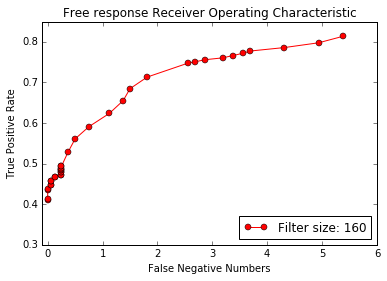

In [16]:

TPR_list= np.load('./resolution/TPR_list_reso.npy') 
FP_num_list = np.load('./resolution/FP_num_list_reso.npy')

#TPR_list1= np.load('TPR_list_pure_good.npy') 
#FP_num_list1 = np.load('FP_num_list_pure_good.npy')

#TPR_list2= np.load('TPR_list_160.npy') 
#FP_num_list2 = np.load('FP_num_list_160.npy')

# false_positive_rate, true_positive_rate, threshol = metrics.roc_curve(y_true.reshape(y_true.shape[0]*y_true.shape[1]), y_score.reshape(y_score.shape[0]*y_score.shape[1]))
# thresholds = []
# count = 1
# for i in range(threshol.shape[0]):
#     if(threshol[i] > 0.01 and count%100 == 0):
#         thresholds.append(threshol[i])
#     count += 1
# thresholds = np.asarray(thresholds)
plt.gca().set_color_cycle(['red', 'green', 'blue'])
plt.title('Free response Receiver Operating Characteristic')
plt.plot((FP_num_list), (TPR_list), marker = 'o')
# plt.plot((FP_num_list1), (TPR_list1), marker = 'o')
# plt.plot((FP_num_list2), (TPR_list2), marker = 'o')

plt.ylim([ 0.3,0.85])
plt.xlim([-0.1,6])
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Negative Numbers')
plt.legend(['Filter size: 160', 'Filter size: 64', 'Filter size: 160'], loc='lower right')
plt.show()

In [ ]:
plt.imshow(y_score[18].reshape(264,132),'gray')

In [ ]:
getPara(y_score[18], y_true[18], 0.43136)

In [ ]:
getPara(y_score[18], y_true[18], 0.40587)

In [ ]:
    (TP, FP, TN, FN, class_lable) = perf_measure(y_true[18], y_score[18], 0.43136)
    class_lable = class_lable.astype(bool).reshape(264,132)
    true =  y_true[18].astype(bool).reshape(264,132)
    
    predict2 = remove_small_objects(class_lable, 64,in_place=False)
    true2 = remove_small_objects(true, 64,in_place=False)
    labeled_array1, num_features1 = label(predict2)
    labeled_array2, num_features2 = label(true2)
    FP_num = num_features1 - num_features2

In [ ]:
num_features1

In [ ]:
plt.imshow(predict2,'gray')

In [ ]:
    (TP, FP, TN, FN, class_lable) = perf_measure(y_true[18], y_score[18], 0.40587)
    class_lable = class_lable.astype(bool).reshape(264,132)
    true =  y_true[18].astype(bool).reshape(264,132)
    
    predict2 = remove_small_objects(class_lable, 64,in_place=False)
    true2 = remove_small_objects(true, 64,in_place=False)
    labeled_array1, num_features1 = label(predict2)
    labeled_array2, num_features2 = label(true2)
    FP_num = num_features1 - num_features2

In [ ]:
num_features1

In [106]:
y_score = np.load('./resolution/predicted_prob.npy')
y_true = np.load('./resolution/answer_image.npy')
reso = np.load('./resolution/resolution.npy')

In [107]:
y_score = y_score[0:y_score.shape[0],1]
y_true = y_true[0:y_true.shape[0],1]

In [108]:
scores = []
trues = []
next_start = 0
for i in range(len(reso)):
    ysize = (reso[i][0] - 56)
    xsize = (reso[i][0]*0.5 - 28)
    scores.append(y_score[next_start: next_start + np.int(ysize * xsize )])
    trues.append(y_true[next_start: next_start + np.int(ysize * xsize )])
    next_start = np.int( next_start + ysize * xsize )
    

In [111]:
for i in range(len(reso)):
    ysize = (reso[i][0] - 56)
    xsize = (reso[i][0]*0.5 - 28)
    print(ysize,xsize)

(456.0, 228.0)
(456.0, 228.0)
(456.0, 228.0)
(456.0, 228.0)
(456.0, 228.0)
(456.0, 228.0)
(328.0, 164.0)
(328.0, 164.0)
(328.0, 164.0)
(456.0, 228.0)
(456.0, 228.0)
(456.0, 228.0)
(456.0, 228.0)
(456.0, 228.0)
(584.0, 292.0)
(584.0, 292.0)
(584.0, 292.0)
(584.0, 292.0)
(584.0, 292.0)
(328.0, 164.0)
(328.0, 164.0)
(328.0, 164.0)


In [112]:
import cv2
import numpy as np
import os
import dicom
import data
import copy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from scipy import ndimage
from keras.optimizers import SGD
from keras.utils import np_utils
from skimage.morphology import remove_small_objects
from scipy import ndimage
from sklearn import metrics, metrics
from scipy.ndimage.measurements import label


def getPara(predict, true, threshold, resolution):
    (TP, FP, TN, FN, class_lable) = perf_measure(true, predict, threshold)
    if((TP + FN) == 0):
        TPR = 0
    else:
        TPR = np.float(TP) / (TP + FN)

    class_lable = class_lable.astype(
        bool).reshape(resolution[0], resolution[1])
    true = true.astype(bool).reshape(resolution[0], resolution[1])

    predict2 = remove_small_objects(class_lable, 160, in_place=False)
    labeled_array1, num_features1 = label(predict2)
    labeled_array2, num_features2 = label(true)
    FP_num = num_features1 - num_features2
    if FP_num < 0:
        FP_num = 0
    return TPR, FP_num


def perf_measure(y_actual, predict, threshold):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    predict = transfer_prob(predict, threshold)
    for i in range(len(predict)):
        if y_actual[i] == predict[i] == 1:
            TP += 1
    for i in range(len(predict)):
        if y_actual[i] == 0 and y_actual[i] != predict[i]:
            FP += 1
    for i in range(len(predict)):
        if y_actual[i] == predict[i] == 0:
            TN += 1
    for i in range(len(predict)):
        if y_actual[i] == 1 and y_actual[i] != predict[i]:
            FN += 1

    return(TP, FP, TN, FN, predict)


def transfer_prob(y_score, threshold):
    y_result = []
    for i in range(len(y_score)):
        if y_score[i] >= threshold:
            y_result.append(1)
        else:
            y_result.append(0)
    return np.asarray(y_result)



In [194]:
y_score = np.load('./resolution/predicted_prob.npy')
y_true = np.load('./resolution/answer_image.npy')
reso = np.load('./resolution/resolution.npy')

y_score = y_score[0:y_score.shape[0], 1]
y_true = y_true[0:y_true.shape[0], 1]

scores = []
trues = []
next_start = 0
for i in range(len(reso)):
    ysize = (reso[i][0] - 56)
    xsize = (reso[i][0] * 0.5 - 28)
    reso[i][0] = ysize
    reso[i][1] = xsize
    scores.append(y_score[next_start: next_start + np.int(ysize * xsize)])
    trues.append(y_true[next_start: next_start + np.int(ysize * xsize)])
    next_start = np.int(next_start + ysize * xsize)
    #print(next_start,ysize,xsize)

                                                                                                                                                                                             
y_score = np.asarray(scores)
y_true = np.asarray(trues)
#y_true = y_true.astype(np.int)

set_size = 22

count = 1


thresholds = []
tmp = 0
for m in range(1, 10, 1):
    tmp += 1
    # print(m/np.float(100))
    thresholds.append(m / np.float(100))
for i in range(1, 10, 1):
    thresholds.append(i / np.float(10))
for m in range(90, 100, 1):
    thresholds.append(m / np.float(100))
tmp = 0
for m in range(900, 1000, 1):
    tmp += 1
    if(tmp % 10 == 0):
        thresholds.append(m / np.float(1000))
thresholds = sorted(thresholds, reverse=True)
thresholds = np.asarray(thresholds)



In [198]:
TPR_list = []
FP_num_list = []
delete = [6, 7, 12, 19, 21]

#delete = [6,7,8,9,10,11,12,13,19,20,21]
for t in range(1, thresholds.size):
    tpr_sum = 0
    fp_sum = 0
    for i in range(set_size):
        if i not in delete:
            TPR, FP_num = getPara(y_score[i], y_true[i].astype(np.int),  thresholds[t], reso[i])

/Users/fangzhiyuan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/fangzhiyuan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


KeyboardInterrupt: 

In [199]:
getPara(y_score[i], y_true[i].astype(np.int),  thresholds[t], reso[i])

/Users/fangzhiyuan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/fangzhiyuan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(0.5129474485910129, 6)

In [170]:
predict = y_score[i]
true = y_true[i]
threshold = 0.5

In [174]:
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    predict = transfer_prob(predict, threshold)
    y_actual = true

In [175]:
    for i in range(len(predict)):
        if y_actual[i] == predict[i] == 1:
            TP += 1
    for i in range(len(predict)):
        if y_actual[i] == 0 and y_actual[i] != predict[i]:
            FP += 1
    for i in range(len(predict)):
        if y_actual[i] == predict[i] == 0:
            TN += 1
    for i in range(len(predict)):
        if y_actual[i] == 1 and y_actual[i] != predict[i]:
            FN += 1

IndexError: invalid index to scalar variable.

In [176]:
    for i in range(len(predict)):
        if y_actual[i] == predict[i] == 1:
            TP += 1

IndexError: invalid index to scalar variable.

In [196]:
y_true[i].astype(np.int)

array([0, 0, 0, ..., 0, 0, 0])

In [200]:
reso

array([[  4.56000000e+02,   2.28000000e+02,   5.85900000e-01,
          5.85900000e-01],
       [  4.56000000e+02,   2.28000000e+02,   5.85900000e-01,
          5.85900000e-01],
       [  4.56000000e+02,   2.28000000e+02,   5.85900000e-01,
          5.85900000e-01],
       [  4.56000000e+02,   2.28000000e+02,   5.85900000e-01,
          5.85900000e-01],
       [  4.56000000e+02,   2.28000000e+02,   5.85900000e-01,
          5.85900000e-01],
       [  4.56000000e+02,   2.28000000e+02,   5.85900000e-01,
          5.85900000e-01],
       [  3.28000000e+02,   1.64000000e+02,   7.29166687e-01,
          7.29166687e-01],
       [  3.28000000e+02,   1.64000000e+02,   7.29166687e-01,
          7.29166687e-01],
       [  3.28000000e+02,   1.64000000e+02,   7.29166687e-01,
          7.29166687e-01],
       [  4.56000000e+02,   2.28000000e+02,   5.46900000e-01,
          5.46900000e-01],
       [  4.56000000e+02,   2.28000000e+02,   5.46900000e-01,
          5.46900000e-01],
       [  4.56000000e

In [201]:


TPR_list1= np.load('TPR_list_160.npy') 
FP_num_list1 = np.load('FP_num_list_160.npy')

#TPR_list2= np.load('TPR_list1.npy') 
#FP_num_list2 = np.load('FP_num_list1.npy')

false_positive_rate, true_positive_rate, threshol = metrics.roc_curve(y_true.reshape(y_true.shape[0]*y_true.shape[1]), y_score.reshape(y_score.shape[0]*y_score.shape[1]))
thresholds = []
count = 1
for i in range(threshol.shape[0]):
    if(threshol[i] > 0.01 and count%100 == 0):
        thresholds.append(threshol[i])
    count += 1
thresholds = np.asarray(thresholds)
   

IndexError: tuple index out of range

In [6]:

TPR_list= np.load('./resolution/TPR_list_reso.npy') 
FP_num_list = np.load('./resolution/FP_num_list_reso.npy')


In [7]:
TPR_list

array([ 0.40961644,  0.41331948,  0.43437496,  0.43639786,  0.44750569,
        0.44814098,  0.45687315,  0.45767279,  0.46589002,  0.46626547,
        0.47305448,  0.47305448,  0.47910395,  0.47944498,  0.48343548,
        0.48405351,  0.48764436,  0.48844036,  0.49338583,  0.49338583,
        0.5295392 ,  0.56103594,  0.59098634,  0.62394333,  0.65527835,
        0.6847334 ,  0.71333   ,  0.74796118,  0.75104789,  0.75621759,
        0.76063337,  0.76641144,  0.77209585,  0.77744104,  0.78603683,
        0.79783071,  0.81357874])

In [8]:
FP_num_list

array([ 0.    ,  0.    ,  0.    ,  0.    ,  0.0625,  0.0625,  0.0625,
        0.0625,  0.125 ,  0.125 ,  0.25  ,  0.25  ,  0.25  ,  0.25  ,
        0.25  ,  0.25  ,  0.25  ,  0.25  ,  0.25  ,  0.25  ,  0.375 ,
        0.5   ,  0.75  ,  1.125 ,  1.375 ,  1.5   ,  1.8125,  2.5625,
        2.6875,  2.875 ,  3.1875,  3.375 ,  3.5625,  3.6875,  4.3125,
        4.9375,  5.375 ])

TPR_list= np.load('./resolution/TPR_list_reso.npy') 
FP_num_list = np.load('./resolution/FP_num_list_reso.npy')

TPR_list1= np.load('./resolution/TPR_list_64.npy') 
FP_num_list1 = np.load('./resolution/FP_num_list_64.npy')

TPR_list2= np.load('./resolution/TPR_list_128.npy') 
FP_num_list2 = np.load('./resolution/FP_num_list_128.npy')

plt.gca().set_color_cycle(['red', 'green', 'blue'])
plt.title('Free response Receiver Operating Characteristic')
plt.plot((FP_num_list), (TPR_list), marker = 'o')
plt.plot((FP_num_list1), (TPR_list1), marker = 'o')
plt.plot((FP_num_list2), (TPR_list2), marker = 'o')
plt.ylim([ 0.3,0.85])
plt.xlim([-0.1,4])
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Negative Numbers')
plt.legend(['Filter size: 160', 'Filter size: 64', 'Filter size: 128'], loc='lower right')
plt.show()

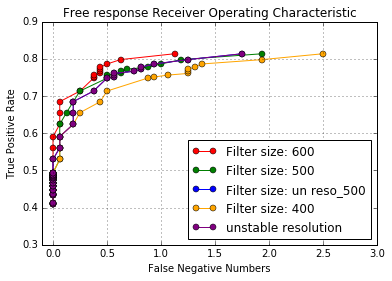

In [5]:

TPR_list= np.load('./resolution/TPR_list_600.npy') 
FP_num_list = np.load('./resolution/FP_num_list_600.npy')
TPR_list1= np.load('./resolution/TPR_list_500.npy')
FP_num_list1 = np.load('./resolution/FP_num_list_500.npy')

TPR_list2= np.load('./resolution/TPR_list_490.npy') 
FP_num_list2 = np.load('./resolution/FP_num_list_490.npy')

TPR_list3= np.load('./resolution/TPR_list_400.npy') 
FP_num_list3 = np.load('./resolution/FP_num_list_400.npy')

TPR_list4= np.load('./resolution/TPR_list_noreso.npy') 
FP_num_list4 = np.load('./resolution/FP_num_list_noreso.npy')

TPR_list5= np.load('./resolution/TPR_list_special.npy') 
FP_num_list5 = np.load('./resolution/FP_num_list_spec.npy')

plt.gca().set_color_cycle(['red', 'green', 'blue','orange','purple','yellow'])
plt.title('Free response Receiver Operating Characteristic')
plt.plot((FP_num_list), (TPR_list), marker = 'o')
plt.plot((FP_num_list1), (TPR_list1), marker = 'o') 
plt.plot((FP_num_list2), (TPR_list2), marker = 'o') 
plt.plot((FP_num_list3), (TPR_list3), marker = 'o') 
plt.plot((FP_num_list4), (TPR_list4), marker = 'o') 

plt.ylim([ 0.3,0.9]) 
plt.xlim([-0.1,3])
plt.grid()
plt.legend(loc='lower right') 
plt.ylabel('True Positive Rate')
plt.xlabel('False Negative Numbers')
plt.legend([ 'Filter size: 600', 'Filter size: 500', 'Filter size: un reso_500','Filter size: 400','unstable resolution'], loc='lower right')
plt.show()

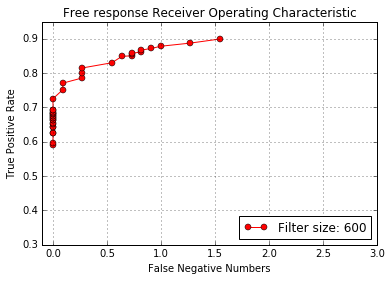

In [8]:

TPR_list4= np.load('./resolution/TPR_list_special.npy') 
FP_num_list4 = np.load('./resolution/FP_num_list_special.npy')

plt.gca().set_color_cycle(['red', 'green', 'blue','orange','purple'])
plt.title('Free response Receiver Operating Characteristic')

plt.plot((FP_num_list4), (TPR_list4), marker = 'o') 

plt.ylim([ 0.3,0.95]) 
plt.xlim([-0.1,3])
plt.grid()
plt.legend(loc='lower right') 
plt.ylabel('True Positive Rate')
plt.xlabel('False Negative Numbers')
plt.legend([ 'Filter size: 600', 'Filter size: 500', 'Filter size: un reso_500','Filter size: 400','unstable resolution'], loc='lower right')
plt.show()